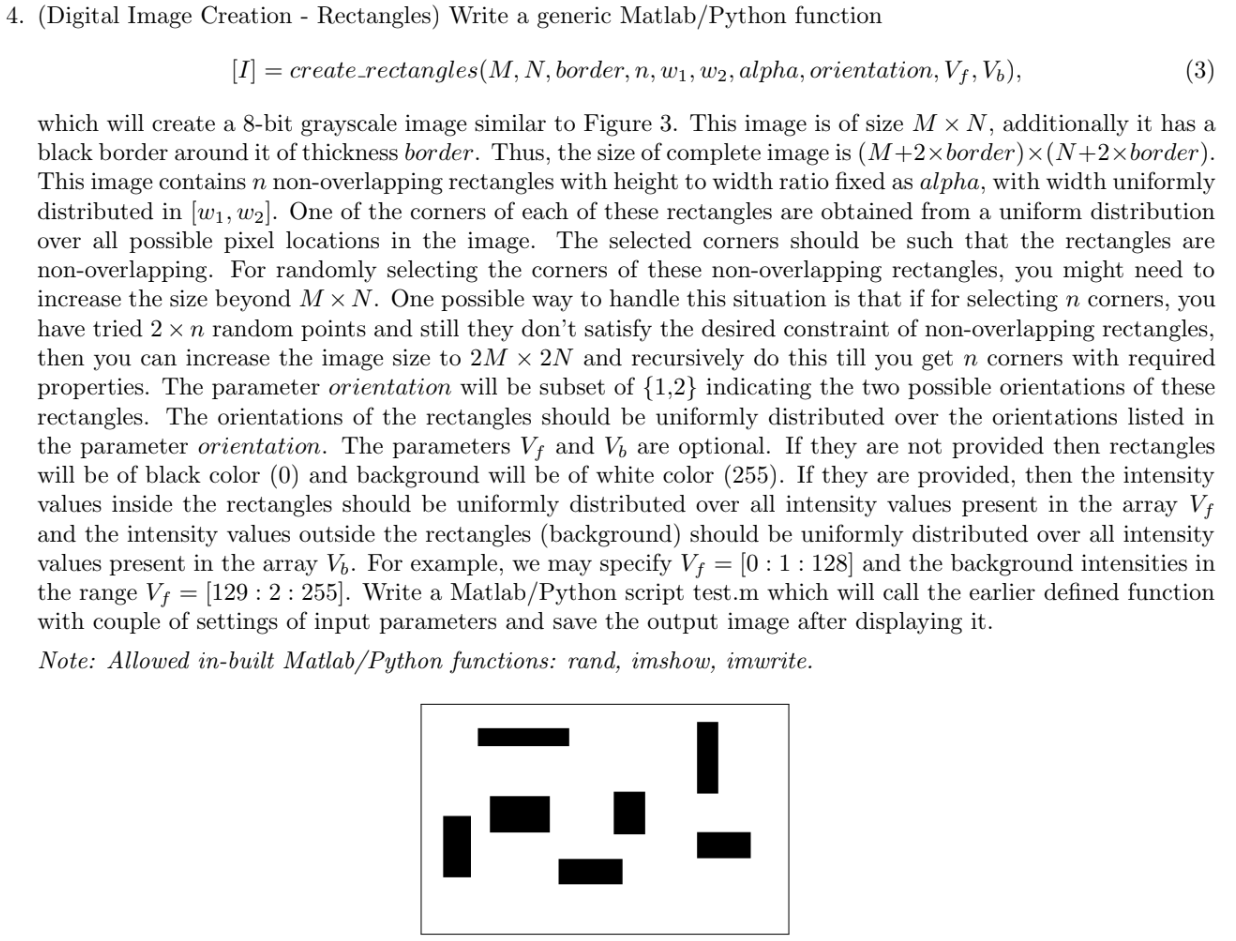

In [3]:
import numpy as np
import random
import sys
# helper function to create a black rectangles
# It takes image , corner of a rectangle , row which is length , col which is breadth , Vf 
# Vb which are fore gound and backgorund intensities
# and width of the borde

def draw_rectangle(image , corner , row , col ,vf , vb , border  ):
  for i in range(corner[0], corner[0] + row ):
    for j in range(corner[1], corner[1]+col):
      image[i][j]=0

# helper function to create a  rectangles with pixel values uniformly distributed over Vf
# It takes image , corner of a rectangle , row which is length , col which is breadth , Vf 
# Vb which are fore gound and backgorund intensities
# and width of the borde
def draw_rectangle2(image , corner , row , col ,vf , vb , border  ):

  for i in range(corner[0], corner[0] + row ):
    for j in range(corner[1], corner[1]+col):
      fg = np.random.choice(vf)
      image[i][j]=fg

# Helper function to check if new rectangle genrated overlaps with already 
# existing rectangles
# Arg 1 new rectangle 
# Arg 2 all other rectangles
def check_overlap(rectangle, rectangles):
    new_x = rectangle[0][0]
    new_y = rectangle[0][1]
    new_width = rectangle[1]
    new_height = rectangle[2]

    for r in rectangles:
        old_x = r[0][0]
        old_y = r[0][1]
        old_width = r[1]
        old_height = r[2]
# check the conditon of not overlapping
        if new_x + new_width < old_x or old_x + old_width <new_x or new_y + new_height <old_y or old_y + old_height < new_y:
          continue
        else:
          return True
    return False
# helper function to check the alpha is integer
def is_integer(arg):
    if isinstance(arg, int):
        return True
    else:
        return False


def create_rectangles(M, N, border, n, w1, w2, ratio , Vf=None, Vb=None):
    # image = np.zeros((M + 2*border, N + 2*border), dtype=np.uint8)

  # check if the arguements given are correct 
    if is_integer(ratio) == False or ratio <=0:
      print("Provide alpha a positive integer , not a decimal or negative value")
      sys.exit(1)
    if M <= 0 or N <= 0 or border < 0 or n <= 0 or w1 <= 0 or w2 <= 0 or w1 > w2 :
      print("Arguements are invalid ")
      sys.exit(1)
    if w1>M or w1 > N or w2 > M or w2 > N :
      print("Arguements are invalid")
      sys.exit(1)
    # initialize the image with 0 
    image = [[0 for j in range(N + 2*border)] for i in range(M + 2*border)]

    if Vb is None:
      image = np.ones((M + 2 * border, N + 2 * border)) * 255
    else:
      for i in range (M + 2*border):
        for j in range( N + 2*border):
          bg = np.random.choice(Vb)
          image[i][j] = bg
          if i < border or j < border or i>= M + border or j >= N+ border:
            image[i][j] = 0
# make a black border around the image
    for i in range(M+2*border):
      for j in range(N+2*border):
        if i < border or j < border or i >=M + border or j >= N + border:
          image[i][j] =0
    # print(image)
    corners = []
    rectangles=[]
    for i in range(2 * n):
        # select one corner randomly
        width= random.randint(w1, w2+1)
        x = random.randint(w2*ratio + border, M + border - w2*ratio)
        y = random.randint(w2*ratio + border, N + border - w2*ratio)
        corner = (x, y)
        length = ratio * width
        # choose a random orientaion uniformly distributed over o and 1
        orientation = np.random.choice([0,1])
# We create two orientations
        if(orientation == 1):
          row = length
          col = width
        else:
          row = width 
          col = length
        
        rectangle = [corner , row , col]
        # Check overlapping conditon
        overlap = False
        if(check_overlap(rectangle,rectangles)):
          # print('overlapping')
          overlap = True
        # If there is no overlap, add the center to the list
        if not overlap:
          # pass
          
          rectangles.append(rectangle)
        # If we have enough centers, stop searching
        if len(rectangles) == n:
            break
    # If we couldn't place enough discs, increase the image size and try again

    if len(rectangles) < n:
      print('insufficient image space ,hence trying for 2M * 2N image size')
      return create_rectangles(2 * M, 2 * N, border, n, w1, w2, ratio , Vf, Vb)
    if Vb is None : 
      for rectang in rectangles:
        # print('hello')
        draw_rectangle(image , rectang[0] , rectang[1] , rectang[2] , Vf , Vb , border)
    else:
      for rectang in rectangles:
        draw_rectangle2(image , rectang[0] , rectang[1] , rectang[2] , Vf , Vb , border) 

    return image


Test 1 Draw 10 black and white image

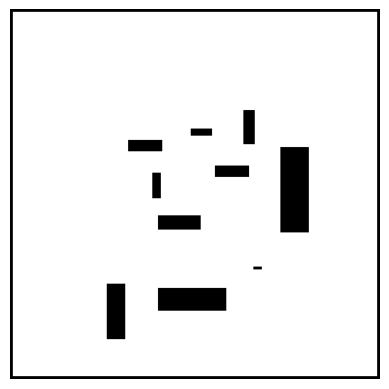

In [7]:
import matplotlib.pyplot as plt
image = create_rectangles(256,256,2,10,2,20,3,None,None)
# print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image1.png', image, cmap='gray')

Test 2 Draw 100 black and white image 

insufficient image space ,hence trying for 2M * 2N image size


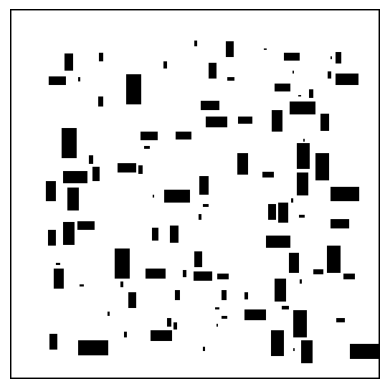

In [8]:
import matplotlib.pyplot as plt
image = create_rectangles(256,256,2,100,2,20,2,None,None)
# Do not confuse if the rectangles are overlapping 
# print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image2.png', image, cmap='gray')

Test 3 Provide vf and vb and draw 10 images

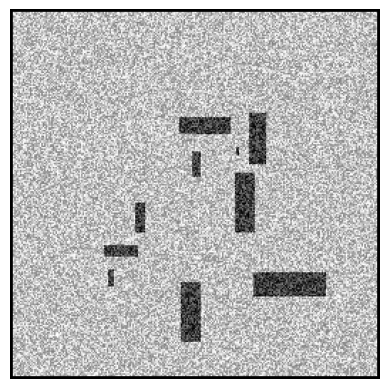

In [9]:
import matplotlib.pyplot as plt
image = create_rectangles(256,256,2,10,2,20,3,range(0,128,1),range(128,255,2))
# it may take 5 seconds
# print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image3.png', image, cmap='gray')

Test 4 Draw low dimension image

insufficient image space ,hence trying for 2M * 2N image size
insufficient image space ,hence trying for 2M * 2N image size


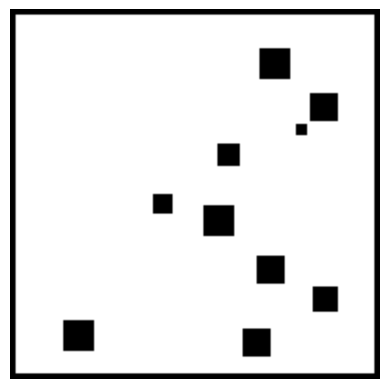

In [15]:
import matplotlib.pyplot as plt
image = create_rectangles(32,32,2,10,4,10,1,None,None)
# print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image4.png', image, cmap='gray')

Draw 100 rectangles

insufficient image space ,hence trying for 2M * 2N image size


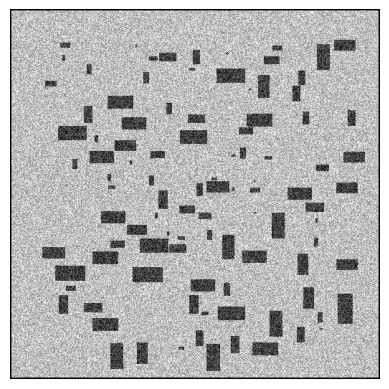

In [16]:
import matplotlib.pyplot as plt
image = create_rectangles(256,256,2,100,2,20,2,range(0,128,1),range(128,255,2))
# Do not confuse if the rectangles are overlapping 
# zoom in 
# It may take 11 seconds
# print(image)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
plt.imsave('image5.png', image, cmap='gray')